## Chapter 3

## Calculus

### 3.1 Intro to Numerical Calculus

The calculus was the first achievement of modern mathematics and it is difficult to overestimate its importance.
-Hungarian-American Mathematician John von Neumann
In this chapter we build some of the common techniques for approximating the two primary computations in calculus: taking derivatives and evaluating definite integrals. Beyond differentiation and integration one of the major applications of differential calculus was optimization. The last several sections of this chapter focus on numerical routines for approximating the solutions to optimization problems. To see an introduction video for this chapter go to https://youtu.be/58zrgdf1cdY.

Recall the typical techniques from differential calculus: the power rule, the chain rule, the product rule, the quotient rule, the differentiation rules for exponentials, inverses, and trig functions, implicit differentiation, etc. With these rules, and enough time and patience, we can find a derivative of any algebraically defined function. The truth of the matter is that not all functions are given to us algebraically, and even the ones that are given algebraically are sometimes really cumbersome.



---

### Exercise 3.1. 

A water quality engineering team wants to find the rate at which the volume of waste water is changing in their containment pond throughout the year. They presently only have data on the specific geometric shape of the containment pond as well as the depth of the waste water each day for the past year. Propose several methods for approximating the first derivative of the volume of the waste water pond.




---

### Exercise 3.2. 

When a police officer fires a radar gun at a moving car it uses a laser to measure the distance from the officer to the car:

- The speed of light is constant.
- The time between when the laser is fired and when the light reflected off of the car is received can be measured very accurately.
- Using the formula distance $=$ rate $\cdot$ time, the time for the laser pulse to be sent and received can then be converted to a distance.

How does the radar gun then use that information to calculate the speed of the moving car?




---

Integration, on the other hand, is a more difficult situation. You may recall some of the techniques of integral calculus such as the power rule, $u$-substitution, and integration by parts. However, these tools are not enough to find an antiderviative for any given function. Furthermore, not every function can be written algebraically.




---

### Exercise 3.3. 

In statistics the function known as the normal distribution (the bell curve) is defined as

$$
N(x)=\frac{1}{\sqrt{2 \pi}} e^{-x^{2} / 2}
$$

One of the primary computations of introductory statistics is to find the area under a portion of this curve since this area gives the probability of some event

$$
P(a<x<b)=\int_{a}^{b} \frac{1}{\sqrt{2 \pi}} e^{-x^{2} / 2} d x
$$

The trouble is that there is no known antiderivative of this function. Propose a method for approximating this area.




---

### Exercise 3.4. 

Give a list of five functions for which an exact algebraic derivative is relatively easy but an exact antiderivative is either very hard or maybe impossible. Be prepared to compare with your peers.




---

### Exercise 3.5. 

A dam operator has control of the rate at which water is flowing out of a hydroelectric dam. He has records for the approximate flow rate through the dam over the course of a day. Propose a way for the operator to use his data to determine the total amount of water that has passed through the dam during that day.




---

What you've seen here are just a few examples of why you might need to use numerical calculus instead of the classical routines that you learned earlier in your mathematical career. Another typical need for numerical derivatives and integrals arises when we approximate the solutions to differential equations in the later chapters of this book.

Throughout this chapter we will make heavy use of Taylor's Theorem to build approximations of derivatives and integrals. If you find yourself still a bit shaky on Taylor's Theorem it would probably be wise to go back to Section 1.4 and do a quick review.

At the end of the chapter we'll examine a numerical technique for solving optimization problems without explicitly finding derivatives. Then we'll look at a common use of numerical calculus for fitting curves to data.



### 3.2 Differentiation

### 3.2.1 The First Derivative




---

### Exercise 3.6. 

Recall from your first-semester Calculus class that the derivative of a function $f(x)$ is defined as

$$
f^{\prime}(x)=\lim _{\Delta x \rightarrow 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}
$$

A Calculus student proposes that it would just be much easier if we dropped the limit and instead just always choose $\Delta x$ to be some small number, like 0.001 or $10^{-6}$. Discuss the following questions:

1. When might the Calculus student's proposal actually work pretty well in place of calculating an actual derivative?

2. When might the Calculus student's proposal fail in terms of approximating the derivative?



---

In this section we'll build several approximation of first and second derivatives. The primary idea for each of these approximations is:

- Partition the interval $[a, b]$ into $N$ sub intervals
- Define the distance between two points in the partition as $h$.
- Approximate the derivative at any point $x$ in the interval $[a, b]$ by using linear combinations of $f(x-h), f(x), f(x+h)$, and/or other points in the partition.

Partitioning the interval into discrete points turns the continuous problem of finding a derivative at every real point in $[a, b]$ into a discrete problem where we calculate the approximate derivative at finitely many points in $[a, b]$.

**Figure 3.1: A partition of the interval $[a, b]$.**

![](https://cdn.mathpix.com/cropped/2025_02_27_429587f441ab5f434461g-04.jpg?height=112&width=912&top_left_y=1765&top_left_x=693)


Figure 3.1 shows a depiction of the partition as well as making clear that $h$ is the separation between each of the points in the partition. Note that in general the points in the partition do not need to be equally spaced, but that is the simplest place to start.



### Exercise 3.7. 

Let's take a close look at partitions before moving on to more details about numerical differentiation.

1. If we partition the interval $[0,1]$ into 3 equal sub intervals each with length $h$ then:
    * $h= ? ? $
    * $[0,1]=[0, ? ?] \cup[? ?, ? ?] \cup[? ?, 1]$
    * There are four total points that define the partition. They are $0, ? ?, ? ?, 1$.

2.  If we partition the interval $[3,7]$ into 5 equal sub intervals each with length $h$ then:
    * $h= ? ?$
    *  $[3,7]=[3, ? ?] \cup\left[? ?, ? ?\right] \cup[? ?, ? ?] \cup[? ?, ? ?] \cup[? ?, 7]$
    * There are 6 total points that define the partition. They are $0, ? ?, ? ?, ? ?, ? ?, 7$.

3. More generally, if a closed interval $[a, b]$ contains $N$ equal sub intervals where
$$
[a, b]=\underbrace{[a, a+h] \cup[a+h, a+2 h] \cup \cdots \cup[b-2 h, b-h] \cup[b-h, b]}_{N \text { total sub intervals }}
$$

then the length of each sub interval, $h$, is given by the formula

$$
h=\frac{? ?-? ?}{? ?}
$$




---

### Exercise 3.8. 

In Python's numpy library there is a nice tool called `np.linspace()` that partitions an interval in exactly the way that we want. The command takes the form `np.linspace(a,b,n)` where the interval is $[a, b]$ and $n$ the number of points used to create the partition. For example, `np.linspace(0,1,5)` will produce the list of numbers $0,0.25,0.5,0.75$, 1. Notice that there are 5 total points, the first point is $a$, the last point is $b$, and there are $n-1$ total sub intervals in the partition. Hence, if we want to partition the interval $[0,1]$ into 20 equal sub intervals then we would use the command np.linspace $(0,1,21)$ which would result in a list of numbers starting with $0,0.05,0.1,0.15$, etc. What command would you use to partition the interval $[5,10]$ into 100 equal sub intervals?




---

### Exercise 3.9. 

Consider the Python command `np.linspace(0,1,50)`.

1. What interval does this command partition?
2. How many points are going to be returned?
3. How many equal length subintervals will we have in the resulting partition?
4. What is the length of each of the subintervals in the resulting partition?


---

Now let's get back to the discussion of numerical differentiation. If we recall
that the definition of the first derivative of a function is

$$
\frac{d f}{d x}=\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}
$$

our first approximation for the first derivative is naturally

$$
\frac{d f}{d x} \approx \frac{f(x+h)-f(x)}{h}
$$

In this approximation of the derivative we have simply removed the limit and instead approximated the derivative as the slope. It should be clear that this approximation is only good if $h$ is small. In Figure 3.2 we see a graphical depiction of what we're doing to approximate the derivative. The slope of the tangent line $(\Delta y / \Delta x)$ is what we're after, and a way to approximate it is to calculate the slope of the secant line formed by looking $h$ units forward from the point $x$.

**Figure 3.2: The forward difference differentiation scheme for the first derivative.**

![](https://cdn.mathpix.com/cropped/2025_02_27_429587f441ab5f434461g-06.jpg?height=641&width=920&top_left_y=1124&top_left_x=692)


While this is the simplest and most obvious approximation for the first derivative there is a much more elegant technique, using Taylor series, for arriving at this approximation. Furthermore, the Taylor series technique suggests an infinite family of other techniques.




---

### Exercise 3.10. 

From Taylor's Theorem we know that for an infinitely differentiable function $f(x)$,

$$f(x)=f\left(x_{0}\right)+\frac{f^{\prime}\left(x_{0}\right)}{1!}\left(x-x_{0}\right)^{1}+\frac{f^{\prime \prime}\left(x_{0}\right)}{2!}\left(x-x_{0}\right)^{2}+\frac{f^{(3)}\left(x_{0}\right)}{3!}\left(x-x_{0}\right)^{3}+\cdots$$

We're going to rewrite this in a different form so that the series is expanded in powers of $h$ and is centered at $x$. Think of $h$ as the displacement between the center. $x_0$, and the new point $x$. First use the substitution $h = x - x_0$ or $x = x_0 + h$ and change all the $x$ terms to $x_0 + h$.  You should now have a series expansion with 

$$f(x_0 + h) = f(x_0) + ?? + ?? + ??.$$

Now simply rename $x_0$ to $x$ to get a series centered at $x$:

$$f(x + h) = f(x) + ?? + ?? + ??.$$

This new form is useful for derivative estimation as we'll soon see.





---

### Exercise 3.11. 

Solve the result from the previous problem for $f^{\prime}(x)$ to create an approximation for $f^{\prime}(x)$ using $f(x+h), f(x)$, and some higher order terms. (fill in the blanks and the question marks)

$$
f^{\prime}(x)=\frac{f(x+h)-? ? ?}{? ?}+ ??
$$

$\qquad$




---

### Exercise 3.12. 

In the formula that you developed in Exercise 3.11, if we were to drop everything after the fraction (called the remainder) we know that we would be introducing error into our derivative computation. If $h$ is taken to be very small then the first term in the remainder is the largest and everything else in the remainder can be ignored (since all subsequent terms should be extremely small ... pause and ponder this fact). Therefore, the amount of error we make in the derivative computation by dropping the remainder depends on the power of $h$ in that first term in the remainder.

What is the power of $h$ in the first term of the remainder from Exercise 3.11?



---

**Definition 3.1. (Order of a Numerical Differentiation Scheme)** 

The order of a numerical derivative is the power of the step size in the first term of the remainder of the rearranged Taylor Series. For example, a first order method will have " $h^{1}$ " in the first term of the remainder. A second order method will have "??"" in the first term of the remainder. Etc.

The error that you make by dropping the remainder is proportional to the power of $h$ in the first term of the remainder. Hence, the order of a numerical differentiation scheme tells you how to quantify the amount of error that you are making by using that approximation scheme.

**Definition 3.2. (Big O Notation)** 

We say that the error in a differentiation scheme is $\mathcal{O}(h)$ (read: "big O of $h$ "), if and only if there is a positive constant $M$ such that

$$
\mid \text { Error } \mid \leq M \cdot h
$$

This is equivalent to saying that a differentiation method is "first order." In other words, if the error in a numerical differentiation scheme is proportional
to the length of the subinterval in the partition of the interval (see Figure 3.1) then we call that scheme "first order" and say that the error is $\mathcal{O}(h)$.
More generally, we say that the error in a differentiation scheme is $\mathcal{O}\left(h^{k}\right)$ (read: "big O of $h^{k}$ ") if and only if there is a positive constant $M$ such that

$$
\mid \text { Error } \mid \leq M \cdot h^{k}
$$

This is equivalent to saying that a differentiation scheme is " $k^{t h}$ order." This means that the error in using the scheme is proportional to $h^{k}$.

**Theorem 3.1.** 

In problem 3.11 we derived a first order approximation of the first derivative:

$$
f^{\prime}(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)
$$

In this formula, $h=\Delta x$ is the step size.
If we approximate the first derivative of a differentiable function $f(x)$ at the point $x$ with the formula

$$
f^{\prime}(x) \approx \frac{f(x+h)-f(x)}{h}
$$

then we know that the error in this approximation is proprotional to $h$ since the approximation scheme is $\mathcal{O}(h)$.




---

### 3.2.2 Error Analysis


### Exercise 3.13. 

Consider the function $f(x)=\sin (x)(1-x)$. The goal of this problem is to make sense of the discussion of the "order" of the derivative approximation. You may want to pause first and reread the previous couple of pages.

1. Find $f^{\prime}(x)$ by hand.
2. Use your answer to part 1 to verify that $f^{\prime}(1)=-\sin (1) \approx$ -0.8414709848 .
3. To approximate the first derivative at $x=1$ numerically with our first order approximation formula from Theorem 3.1 we calculate

$$
f^{\prime}(1) \approx \frac{f(1+h)-f(1)}{h}
$$

We want to see how the error in the approximation behaves as $h$ is made smaller and smaller. Fill in the table below with the derivative approximation and the absolute error associated with each given $h$. You may want to use a spreadsheet to organize your data - use radians!  (You can also do this programatically with Python, see the next exercise.)

| $h$ | Approx. of $f^{\prime}(1)$ | Exact value of $f^{\prime}(1)$ | Abs. \% Error |
| :---: | :---: | :---: | :---: |
| $2^{-1}=0.5$ | $\frac{f(1+0.5)-f(1)}{0.5} \approx-0.99749$ | $-\sin (1) \approx-0.841471$ | $18.54181 \%$ |
| $2^{-2}=0.25$ | $\frac{f(1+0.25)-f(1)}{0.25} \approx-0.94898$ | $-\sin (1) \approx-0.841471$ | $12.77687 \%$ |
| $2^{-3}=0.125$ |  | $-\sin (1)$ |  |
| $2^{-4}=0.0625$ |  | $-\sin (1)$ |  |
| $2^{-5}$ | $-\sin (1)$ |  |  |
| $2^{-6}$ |  | $-\sin (1)$ |  |
| $2^{-7}$ |  | $-\sin (1)$ |  |
| $2^{-8}$ |  | $-\sin (1)$ |  |
| $2^{-9}$ |  | $-\sin (1)$ |  |
| $2^{-10}$ |  | $-\sin (1)$ |  |

4. There was nothing really special in part 3 about powers of 2. Use your spreadsheet to build similar tables for the following sequences of $h$ :

$$
\begin{aligned}
& h=3^{-1}, 3^{-2}, 3^{-3}, \ldots \\
& h=5^{-1}, 5^{-2}, 5^{-3}, \ldots \\
& h=10^{-1}, 10^{-2}, 10^{-3}, \ldots \\
& h=\pi^{-1}, \pi^{-2}, \pi^{-3}, \ldots
\end{aligned}
$$

5. Observation: If you calculate a numerical derivative with a forward difference and then calculate the absolute percent error with a fixed value of $h$, then what do you expect to happen to the absolute error if you divide the value of $h$ by some positive contant $M$ ? It may be helpful at this point to go back to your table and include a column called the error reduction factor where you find the ratio of two successive absolute percenter errors. Observe what happens to this error reduction factor as $h$ gets smaller and smaller.

6. What does your answer to part 5 have to do with the approximation order of the numerical derivative method that you used?



---

### Exercise 3.14. 

The following incomplete block of Python code will help to streamline the previous problem so that you don't need to do the computation with a spreadsheet.

1. Comment every existing line with a thorough description.
2. Fill in the blanks in the code to perform the spreadsheet computations from the previous problem.
3. Run the code for several forms of $h$
4. Do you still observe the same result that you observed in part (e) of the previous problem?
5. We know that for $h \rightarrow 0$ the derivative approximation should mathematically tend toward the exact derivative. Modify the code slightly to see if this is the case. Explain what you see.



h= 0.5 	 Absolute Pct Error= 0.1854181601184709
h= 0.25 	 Absolute Pct Error= 0.12776867710089196 with error reduction 1.4512020029138777
h= 0.125 	 Absolute Pct Error= 0.07225039292956516 with error reduction 1.7684149790776915
h= 0.0625 	 Absolute Pct Error= 0.03815217748298695 with error reduction 1.8937423155410589
h= 0.03125 	 Absolute Pct Error= 0.019573887040617487 with error reduction 1.949136490050133
h= 0.015625 	 Absolute Pct Error= 0.009910221068472835 with error reduction 1.9751211305353678
h= 0.0078125 	 Absolute Pct Error= 0.004985780110301419 with error reduction 1.9876971806271069
h= 0.00390625 	 Absolute Pct Error= 0.00250053851755135 with error reduction 1.9938825478216344
h= 0.001953125 	 Absolute Pct Error= 0.0012521789951432975 with error reduction 1.9969497390149018


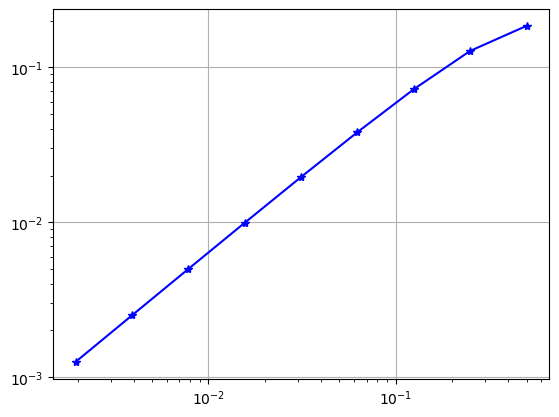

In [1]:

import numpy as np
import matplotlib.pyplot as plt
f = lambda x: np.sin(x) * (1-x) # what does this line do?
exact = -np.sin(1) # what does this line do?
H = 2.0**(-np.arange(1,10)) # what does this line do?
AbsPctError = [] # start off with a blank list of errors
for h in H:
    approx = ( f(1+h) - f(1) ) / h
    AbsPctError.append( np.abs( (approx - exact)/exact ) )
    if h==H[0]:
        print("h=",h,"\t Absolute Pct Error=", AbsPctError[-1])
    else:
        err_reduction_factor = AbsPctError[-2]/AbsPctError [-1]
        print("h=",h,"\t Absolute Pct Error=", AbsPctError[-1],
            "with error reduction",err_reduction_factor)
plt.loglog(H,AbsPctError,'b-*') # Why are we build a loglog plot?
plt.grid()
plt.show()


---

### Exercise 3.15. 

Assume that $f(x)$ is some differentiable function and that we have calculated the value of $f^{\prime}(c)$ using the forward difference formula

$$
f^{\prime}(c) \approx \frac{f(c+h)-f(c)}{h}
$$

Using what you learned from the previous problem to fill in the following table.

| My $h$ | Absolute Percent Error |
| :--- | :--- |
| 0.2 | $2.83 \%$ |
| 0.1 |  |
| 0.05 |  |
| 0.02 |  |




---

### Exercise 3.16. 

Explain the phrase: The first derivative approximation $f^{\prime}(x) \approx$ $\frac{f(x+h)-f(x)}{h}$ is first order.



---

### 3.2.3 Efficient Coding

Now that we have a handle on how the first order approximation scheme for the first derivative works and how the errors will propagate, let's build some code that will take in a function and output the approximate first derivative on an entire interval instead of just at a single point.



### Exercise 3.17. 

We want to build a Python function that accepts:

- a mathematical function,
- the bounds of an interval,
- and the number of subintervals.

The function will return a first order approximation of the first derivative at every point in the interval except at the right-hand side. For example, we could send the function $f(x)=\sin (x)$, the interval $[0,2 \pi]$, and tell it to split the interval into 100 subintervals. We would then get back a value of the derivative $f^{\prime}(x)$ at all of the points except at $x=2 \pi$.

1. First of all, why can't we compute a derivative at the last point?

2. Next, fill in the blanks in the partially complete code below. Every line needs to have a comment explaining exactly what it does.

In [2]:

import numpy as np
import matplotlib.pyplot as plt
def FirstDeriv(f,a,b,N):
    x = np.linspace(a,b,N+1) # What does this line of code do?
    # What's up with the N+1 in the previous line?
    h = x[1] - x[0] # What does this line of code do?
    df = [] # What does this line of code do?
    for j in np.arange(len(x)-1): # What does this line of code do?
        # What's up with the -1 in the definition of the loop?
        #
        # Now we want to build the approximation
        # (f(x+h) - f(x)) / h.
        # Obviously "x+h" is just the next item in the list of
        # x values so when we do f(x+h) mathematically we should
        # write f( x[j+1] ) in Python (explain this).
        # Fill in the question marks below
        df.append( (f( x[j+1] ) - f( x[j] )) / h )
    return df



3. Now we want to call upon this function to build the first order approximation of the first derivative for some function. We'll use the function $f(x)=\sin (x)$ on the interval $[0,2 \pi]$ with 100 sub intervals (since we know what the answer should be). Complete the code below to call upon your FirstDeriv() function and to plot $f(x), f^{\prime}(x)$, and the approximation of $f^{\prime}(x)$.


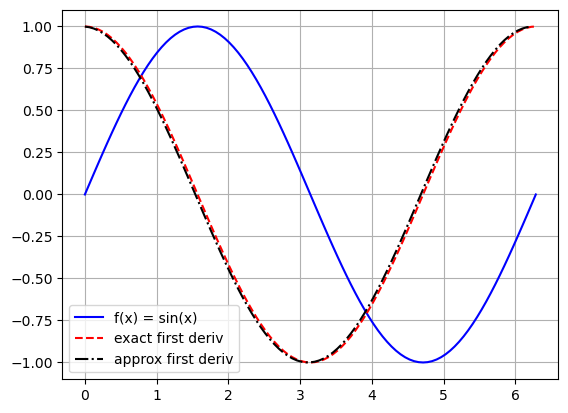

In [3]:

f = lambda x: np.sin(x)
exact_df = lambda x: np.cos(x)
a = 0
b = 2*np.pi
N = 100 # What is this?
x = np.linspace (a,b,N+1)
# What does the prevoius line do?
# What's up with the N+1?
df = FirstDeriv(f,a,b,N) # What does this line do?
# In the next line we plot three curves:
# 1) the function f(x)=sin(x)
# 2) the function f'(x) = cos(x)
# 3) the approximation of f'(x)
# However, we do something funny with the x in the last plot. Why?
plt.plot(x,f(x),'b',x,exact_df(x),'r--',x[0:-1], df, 'k-.')
plt.grid()
plt.legend(['f(x) = sin(x)',
    'exact first deriv',
    'approx first deriv'])
plt.show()




3. Implement your completed code and then test it in several ways:

* Test your code on functions where you know the derivative. Be sure that you get the plots that you expect.
* Test your code with a very large number of sub intervals, $N$. What do you observe?
* Test your code with small number of sub intervals, $N$. What do you observe?




---

### Exercise 3.18. 

Now let's build the first derivative function in a much smarter way - using numpy arrays in Python. Instead of looping over all of the elements we can take advantage of the fact that every thing is stored in arrays. Hence we can just do array operations and do all of the subtractions and divisions at once without a loop.

1. From your previous code, we're going to replace these lines:

```
df = []
for j in np.arange(len(x)-1):
    df.append( (f(x[j+1]) - f(x[j])) /h )
```

2. From the line of code `x = np.linspace(a,b,N+1)` we build an array of $N+1$
values of $x$ starting at $a$ and ending at $b$. In the following questions remember that Python indexes all lists starting at 0 . Also remember that you can call on the last element of a list using an index of -1 . Finally, remember that if you do `x[p:q]` in Python you will get an array of x values starting at index p and ending at index $\mathrm{q}-1$.

* What will we get if we evaluate the code $x[1:]$ ?
* What will we get if we evaluate the code $f(x[1:])$ ?
* What will we get if we evaluate the code $x[0:-1]$ ?
* What will we get if we evaluate the code $f(x[0:-1])$ ?
* What will we give if we evaluate the code $f(x[1:])-f(x[0:-1])$ ?
* What will we give if we evaluate the code $(f(x[1:])-f(x[0:-1])$ ) / h?

3. Add the appropriate single line of code that builds all of the approximations for the first derivative all at once without the need for a loop. What you did in part 2. should help. Your simplified first order first derivative function should look like the code below.



In [4]:
def FirstDerivFirstOrder(f,a,b,N):
    x = np.linspace(a,b,N+1)
    h = x[1] - x[0]
    df = (f(x[1:])-f(x[:-1]))/h# your line of code goes here?
    return df


---

### Exercise 3.19. 

Write code that finds a first order approximation for the first derivative of $f(x)=\sin (x)-x \sin (x)$ on the interval $x \in(0,15)$. Your script should output two plots (side-by-side).
a. The left-hand plot should show the function in blue and the approximate first derivative as a red dashed curve. Sample code for this problem is given below.

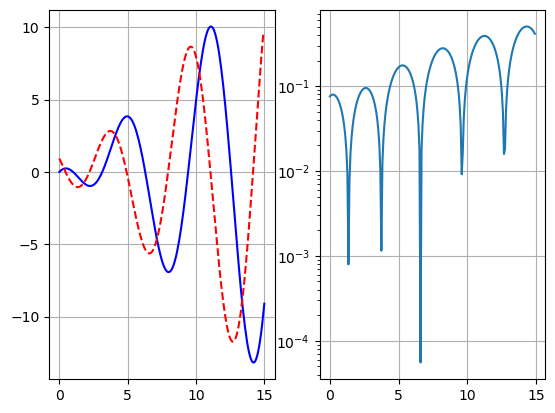

In [5]:

import matplotlib.pyplot as plt
import numpy as np
f = lambda x: np.sin(x) - x*np.sin(x)
a = 0
b = 15
N = 200# make this an appropriately sized number of subintervals
x = np.linspace(a,b,N+1) # what does this line do?
y = f(x) # what does this line do?
df = FirstDerivFirstOrder(f,a,b,N) # what does this line do?
fig, ax = plt.subplots(1,2) # what does this line do?
ax[0].plot(x,y,'b',x[0:-1],df,'r--') # what does this line do?
ax[0].grid()

exact = lambda x: np.cos(x) - (np.sin(x) + x*np.cos(x))# write a function for the exact derivative
# There is a lot going on the next line of code ... explain it.
ax[1].semilogy(x[0:-1],abs(exact(x[0:-1]) - df))
ax[1].grid()


2. The right-hand plot should show the absolute error between the exact derivative and the numerical derivative. You should use a logarithmic $y$ axis for this plot.

In [6]:

exact = lambda x: # write a function for the exact derivative
# There is a lot going on the next line of code ... explain it.
ax[1].semilogy(x[0:-1],abs(exact(x[0:-1]) - df))
ax[1].grid()


SyntaxError: invalid syntax (4006484797.py, line 1)


3. Play with the number of sub intervals, $N$, and demonstrate the fact that we are using a first order method to approximate the first derivative.




---

### 3.2.4 A Better First Derivative

Next we'll build a more accurate numerical first derivative scheme. The derivation technique is the same: play a little algebra game with the Taylor series and see if you can get the first derivative to simplify out. This time we'll be hoping to have a better error approximation.



### Exercise 3.20. 

Consider again the Taylor series for an infinitely differentiable function $f(x)$ :

$$f(x+h) = f(x) + f'(x) h + \frac{f''(x)}{2!} h^2 + \frac{f^{(3)(x)}}{3!}h^3 + \cdots$$

1. Replace $h$ by $-h$ to get (be careful with signs):

$$
f(x-h)= ??
$$

2. Find the difference between $f(x+h)$ and $f(x-h)$ and simplify. Be very careful of your signs.

$$
f(x+h)-f(x-h)= ??
$$

3. Solve for $f^{\prime}(x)$ in your result from part (c). Fill in the question marks and blanks below once you have finished simplifying.

$$
f^{\prime}(x)=\frac{? ? ?-? ? ?}{2 h}+
$$

4. Use your result from part (d) to verify that

$$
f^{\prime}(x)=\ldots+\mathcal{O}\left(h^{2}\right)
$$

5. Draw a picture similar to Figure 3.2 showing what this scheme is doing graphically.




---

### Exercise 3.21. 

Let's return to the function $f(x)=\sin (x)(1-x)$ but this time we will approximate the first derivative at $x=1$ using the formula

$$
f^{\prime}(1) \approx \frac{f(1+h)-f(1-h)}{2 h}
$$

You should already have the first derivative and the exact answer from Exercise 3.13 (if not, then go get them by hand again).

1. Fill in the table below with the derivative approximation and the absolute error associated with each given $h$. You may want to use a spreadsheet to organize your data.  Or generate the data with Python.

| $h$ | Approx. of $f^{\prime}(1)$ | Exact value of $f^{\prime}(1)$ |
| :---: | :---: | :---: |
| Abs. \% Error |  |  |
| $2^{-3}=0.5$ | $-\sin (1)$ |  |
| $2^{-3}=0.25$ | $-\sin (1)$ |  |
| $2^{-3}=0.125$ | $-\sin (1)$ |  |
| $2^{-4}=0.0625$ | $-\sin (1)$ |  |
| $2^{-5}$ | $-\sin (1)$ |  |
| $2^{-6}$ | $-\sin (1)$ |  |
| $2^{-7}$ | $-\sin (1)$ |  |
| $2^{-8}$ | $-\sin (1)$ |  |
| $2^{-9}$ | $-\sin (1)$ |  |

2. There was nothing really special in part (c) about powers of 2. Use your spreadsheet to build similar tables for the following sequences of $h$ :

$$
\begin{aligned}
h & =3^{-1}, 3^{-2}, 3^{-3}, \ldots \\
h & =5^{-1}, 5^{-2}, 5^{-3}, \ldots \\
h & =10^{-1}, 10^{-2}, 10^{-3}, \ldots \\
h & =\pi^{-1}, \pi^{-2}, \pi^{-3}, \ldots
\end{aligned}
$$

3. Observation: If you calculate a numerical derivative with a centered difference and calculate the resulting absolute percent error with a fixed value of $h$, then what do you expect to happen to the absolute percent error if you divide the value of $h$ by some positive constant $M$ ? It may be
helpful to include a column in your table that tracks the error reduction factor as we decrease $h$.


4. What does your answer to part 3. have to do with the approximation order of the numerical derivative method that you used?




---

### Exercise 3.22. 

Assume that $f(x)$ is some differentiable function and that we have calculated the value of $f^{\prime}(c)$ using the centered difference formula

$$
f^{\prime}(c) \approx \frac{f(c+h)-f(c-h)}{2 h} .
$$

Using what you learned from the previous problem to fill in the following table.

| My $h$ | Absolute Percent Error |
| :--- | :--- |
| 0.2 | $2.83 \%$ |
| 0.1 |  |
| 0.05 |  |
| 0.02 |  |
| 0.002 |  |




---

### Exercise 3.23. 

Write a Python function that takes a mathematical function and an interval and returns a second order numerical approximation to the first derivative on the interval. You should try to write this code without using any loops. (Hint: This should really be a minor modification of your first order first derivative code.)




---

### Exercise 3.24. 

Test the code you wrote in the previous exercise on functions where you know the first derivative.




---

### Exercise 3.25. 

The plot shown in Figure 3.3 shows the maximum absolute error between the exact first derivative of a function $f(x)$ and a numerical first derivative approximation scheme. At this point we know two schemes:

$$
f^{\prime}(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)
$$

and

$$
f^{\prime}(x)=\frac{f(x+h)-f(x-h)}{2 h}+\mathcal{O}\left(h^{2}\right) .
$$

1. Which curve in the plot matches with which method. How do you know?

2. Recreate the plot with a function of your choosing.

**Figure 3.3: Maximum absolute error between the first derivative and two different approximations of the first derivative.**

<img src="https://cdn.mathpix.com/cropped/2025_02_27_429587f441ab5f434461g-17.jpg?height=619&width=904&top_left_y=428&top_left_x=513" width="600">




---

### 3.2.5 The Second Derivative

Now we'll search for an approximation of the second derivative. Again, the game will be the same: experiment with the Taylor series and some algebra with an eye toward getting the second derivative to pop out cleanly. This time we'll do the algebra in such a way that the first derivative cancels.

From the previous problems you already have Taylor expansions of the form $f(x+h)$ and $f(x-h)$. Let's summarize them here since you're going to need them for future computations.

$$
\begin{aligned}
& f(x+h)=f(x)+\frac{f^{\prime}(x)}{1!} h+\frac{f^{\prime \prime}(x)}{2!} h^{2}+\frac{f^{(3)}(x)}{3!} h^{3}+\cdots \\
& f(x-h)=f(x)-\frac{f^{\prime}(x)}{1!} h+\frac{f^{\prime \prime}(x)}{2!} h^{2}-\frac{f^{(3)}(x)}{3!} h^{3}+\cdots
\end{aligned}
$$




---

### Exercise 3.26. 

The goal of this problem is to use the Taylor series for $f(x+h)$ and $f(x-h)$ to arrive at an approximation scheme for the second derivative $f^{\prime \prime}(x)$.

1. Add the Taylor series for $f(x+h)$ and $f(x-h)$ and combine all like terms. You should notice that several terms cancel.
$f(x+h)+f(x-h)=$ $\qquad$

2. Solve your answer in part 1. for $f^{\prime \prime}(x)$.

$$
f^{\prime \prime}(x)=\frac{? ?-2 \cdot ? ?+? ?}{h^{2}}+
$$

3. If we were to drop all of the terms after the fraction on the right-hand side of the previous result we would be introducing some error into the derivative computation. What does this tell us about the order of the error for the second derivative approximation scheme we just built?




---

### Exercise 3.27. 

Again consider the function $f(x)=\sin (x)(1-x)$.

1. Calculate the derivative of this function and calculate the exact value of $f^{\prime \prime}(1)$.

2. If we calcuate the second derivative with the central difference scheme that you built in the previous exericse using $h=0.5$ then we get a $4.115 \%$ error. Stop now and verify this percent error calculation.

3. Based on our previous work with the order of the error in a numerical differentiation scheme, what do you predict the error will be if we calculate $f^{\prime \prime}(1)$ with $h=0.25$ ? With $h=0.05$ ? With $h=0.005$ ? Defend your answers.



In [ ]:
f = lambda x: np.sin(x) - x*np.sin(x)
h = 0.5
fpp = (f(1+h) - 2*f(1) + f(1-h)) / h**2


---

### Exercise 3.28. 

Write a Python function that takes a mathematical function and a domain and returns a second order numerical approximation to the second derivative on the interval. You should ALWAYS start by writing pseudo-code as comments in your function. As before, you should write your code without using any loops.




---

### Exercise 3.29. 

Test your second derivative code on the function $f(x)=$ $\sin (x)-x \sin (x)$ by doing the following.

1. Find the analytic second derivative by hand.

2. Find the numerical second derivative with the code that you just wrote.

3. Find the absolute difference between your numerical second derivative and the actual second derivative. This is point-by-point subtraction so you should end up with a vector of errors.

4. Find the maximum of your errors.

5. Now we want to see how the code works if you change the number of points used. Build a plot showing the value of $h$ on the horizontal axis and the maximum error on the vertical axis. You will need to write a loop that gets the error for many different values of $h$. Finally, it is probably best to build this plot on a log-log scale.

6. Discuss what you see? How do you see the fact that the numerical second derivative is second order accurate?



---

The table below summarizes the formulas that we have for derivatives thus far. The exercises at the end of this chapter contain several more derivative approximations. We will return to this idea when we study numerical differential equations in Chapter 5.

| Derivative | Formula | Error | Name |
| :---: | :---: | :---: | :---: |
| $1^{\text {st }}$ | $\frac{f(x+h)-f(x)}{h}$ | $\mathcal{O}(h)$ | Forward Difference |
| $1^{\text {st }}$ | $\frac{f(x)-f(x-h)}{h}$ | $\mathcal{O}(h)$ | Backward Difference |
| $1^{\text {st }}$ | $\frac{f(x+h)-f(x-h)}{2h}$ | $\mathcal{O}\left(h^{2}\right)$ | Centered Difference |
| $2^{\text {nd }}$ | $\frac{f(x+h)-2f(x)+f(x-h)}{h^{2}}$ | $\mathcal{O}\left(h^{2}\right)$ | Centered Difference |



### Exercise 3.30. 

Let $f(x)$ be a twice differentiable function. We are interested in the first and second derivative of the function $f$ at the point $x=1.74$. Use what you have learned in this section to answer the following questions. (For clarity, you can think of " $f$ " as a different function in each of the following questions ...it doesn't really matter exactly what function $f$ is.)

1. Johnny used a numerical first derivative scheme with $h=0.1$ to approximate $f^{\prime}(1.74)$ and found an abolute percent error of $3.28 \%$. He then used $h=0.01$ and found an absolute percent error of $0.328 \%$. What was the order of the error in his first derivative scheme? How can you tell?

2. Betty used a numerical first derivative scheme with $h=0.2$ to approximate $f^{\prime}(1.74)$ and found an absolute percent error of $4.32 \%$. She then used $h=0.1$ and found an absolute percent error of $1.08 \%$. What numerical first derivative scheme did she likely use?

3. Shelby did the computation

$$
f^{\prime}(1.74) \approx \frac{f(1.78)-f(1.74)}{0.04}
$$

and found an absolute percent error of $2.93 \%$. If she now computes

$$
f^{\prime}(1.74) \approx \frac{f(1.75)-f(1.74)}{0.01}
$$

what will the new absolute percent error be?

4. Harry wants to compute $f^{\prime \prime}(1.74)$ to within $1 \%$ using a central difference scheme. He tries $h=0.25$ and gets an absolute percent error of $3.71 \%$. What $h$ should he try next so that his absolute percent error is less than (but close to) $1 \%$ ?

